In [1]:
import pandas as pd
import numpy as np

from datetime import datetime as dt
import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
steps = pd.read_csv('/home/max/WORK/mini-internet/platform/step_log.log')

mini_steps = pd.read_csv('/home/max/mini-internet/platform/time.log')

ASes = steps['AS'].unique().tolist()
ASes2 = mini_steps['AS'].unique().tolist()

In [3]:
t_format = '%Y-%m-%d_%H-%M-%S'
mini_steps['T'] = mini_steps['TIME'].apply(lambda x: dt.strptime(x, t_format).timestamp())

In [4]:
mini_steps

,AS,TIME,T
0,2,2023-09-08_17-44-57,1.694188e+09
1,2,2023-09-08_18-46-59,1.694192e+09
2,2,2023-09-08_18-47-27,1.694192e+09
3,2,2023-09-08_18-48-03,1.694192e+09
4,5,2023-09-08_22-36-10,1.694205e+09
5,5,2023-09-09_00-55-38,1.694214e+09
6,5,2023-09-09_00-56-17,1.694214e+09
7,5,2023-09-09_00-57-28,1.694214e+09
8,5,2023-09-09_00-58-39,1.694214e+09
9,10,2023-09-09_01-03-52,1.694214e+09


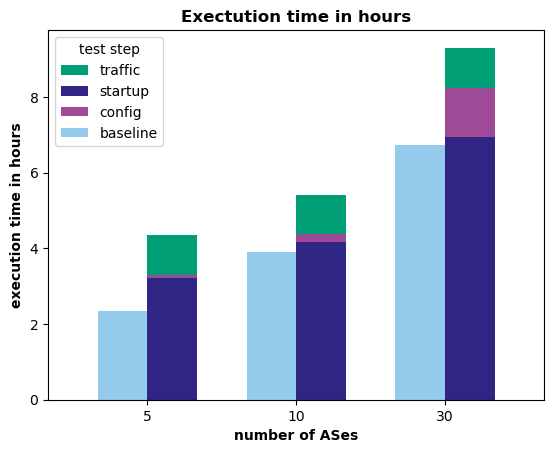

In [5]:
legend_ind = False
colors1 = ['#000000', '#009e74', '#0071b2', '#56b4e9', '#f0e442', '#e69d00', '#d55c00', '#cc79a7']
colors2 = ['#cc79a7', '#337539', '#9f4a96', '#5da899', '#94caec', '#dcce7d', '#2f2585', '#7e2954']


for a in ASes:
    df = steps.query(f'AS=={a}')
    df['TIMESTEP'] = df['TIMESTEP'].apply(lambda x: str(x)[:10])

    startup_time = int(df.query('STEP=="STARTUP_END"').iloc[0]['TIMESTEP']) - int(df.query('STEP=="STARTUP_START"').iloc[0]['TIMESTEP'])

    config_time = int(df.query('STEP=="CONFIG_END"').iloc[0]['TIMESTEP']) - int(df.query('STEP=="CONFIG_START"').iloc[0]['TIMESTEP'])

    gen_time = int(df.query('STEP=="GEN_END"').iloc[0]['TIMESTEP']) - int(df.query('STEP=="GEN_START"').iloc[0]['TIMESTEP'])

    time = int(df.query('STEP=="GEN_END"').iloc[0]['TIMESTEP']) - int(df.query('STEP=="STARTUP_START"').iloc[0]['TIMESTEP'])
    time = startup_time+config_time+gen_time


    if not legend_ind:
        plt.bar(x=ASes.index(a)*0.75+(0.25/2), width=0.25, bottom=0, height=time/60/60, color=colors1[1], label='traffic')
        plt.bar(x=ASes.index(a)*0.75+(0.25/2), width=0.25, bottom=0, height=startup_time/60/60, color=colors2[6], label='startup')
        plt.bar(x=ASes.index(a)*0.75+(0.25/2), width=0.25, bottom=startup_time/60/60, height=config_time/60/60, color=colors2[2], label='config')
        # if a != 30:
        df2 = mini_steps.query(f'AS=={a}')
        baseline = int(df2.iloc[3]['T'])-int(df2.iloc[0]['T'])
        # plt.plot([(ASes.index(a)*0.75-0.25), (ASes.index(a)*0.75+0.25)], [baseline/60/60, baseline/60/60], color='k')
        plt.bar(x=ASes.index(a)*0.75-(0.25/2), width=0.25, bottom=0, height=baseline/60/60, color=colors2[-4], label='baseline')
        legend_ind = True
    else:
        plt.bar(x=ASes.index(a)*0.75+(0.25/2), width=0.25, bottom=0, height=time/60/60, color=colors1[1])
        plt.bar(x=ASes.index(a)*0.75+(0.25/2), width=0.25, bottom=0, height=startup_time/60/60, color=colors2[6])
        plt.bar(x=ASes.index(a)*0.75+(0.25/2), width=0.25, bottom=startup_time/60/60, height=config_time/60/60, color=colors2[2])
        # if a != 30:
        df2 = mini_steps.query(f'AS=={a}')
        baseline = int(df2.iloc[3]['T'])-int(df2.iloc[0]['T'])
        plt.bar(x=ASes.index(a)*0.75-(0.25/2), width=0.25, bottom=0, height=baseline/60/60, color=colors2[-4])

# plt.grid()
plt.xlabel('number of ASes', fontweight='bold')
plt.ylabel('execution time in hours', fontweight='bold')
plt.xticks(np.arange(0, len(ASes)*0.75, 0.75), labels=[str(x) for x in ASes])
plt.legend(title='test step')
plt.xlim(-0.5, 2)
plt.title('Exectution time in hours', fontweight='bold')
plt.savefig('scalability_time.pdf')

In [6]:
t_format = '%m-%d-%Y-%H:%M:%S'
memory = pd.read_csv('/home/max/WORK/mini-internet/platform/ressources_log.log')
memory['TIME'] = memory['TIME'].apply(lambda x: dt.strptime(x, t_format).timestamp())

TypeError: strptime() argument 1 must be str, not float

In [ ]:
for a in ASes:
    df = steps.query(f'AS=={a}')
    df['TIMESTEP'] = df['TIMESTEP'].apply(lambda x: str(x)[:10])

    start_timestamp = int(df.query('STEP=="STARTUP_START"').iloc[0]['TIMESTEP'])
    end_timestamp = int(df.query('STEP=="GEN_END"').iloc[0]['TIMESTEP'])

    start_config = int(df.query('STEP=="CONFIG_START"').iloc[0]['TIMESTEP'])
    end_config = int(df.query('STEP=="CONFIG_END"').iloc[0]['TIMESTEP'])

    start_gen = int(df.query('STEP=="GEN_START"').iloc[0]['TIMESTEP'])
    end_startup = int(df.query('STEP=="STARTUP_END"').iloc[0]['TIMESTEP'])

    as_mem = round(memory.query(f'TIME >= {start_timestamp} and TIME <= {end_timestamp}')['MEM'].mean(), 2)
    startup_mem = round(memory.query(f'TIME >= {start_timestamp} and TIME <= {end_startup}')['MEM'].mean(), 2)
    conf_mem = round(memory.query(f'TIME >= {start_config} and TIME <= {end_config}')['MEM'].mean(), 2)
    gen_mem = round(memory.query(f'TIME >= {start_gen} and TIME <= {end_timestamp}')['MEM'].mean(), 2)

    print(f'{a}: {as_mem} | {startup_mem} | {conf_mem} | {gen_mem}')

: 